# Import et structuration des données

On structure les données de façon à savoir à quelle condition correspond quel enregistrement

Ici c1 (pas de timer peu de contrainte de temps) correspond aux enregistrements 1,3 et 5

Ici c2 (timer forte contrainte de temps) correspond aux enregistrements 2,4 et 6

Ici c2 (timer peu de contrainte de temps) correspond aux enregistrements 7,8 et 9

In [1]:
import pandas as pd
data={'c1':{'r1':'','r3':'','r5':''},'c2':{'r2':'','r4':'','r6':''},'c3':{'r7':'','r8':'','r9':''}}

In [2]:
for c in data:
    for r in data[c]:
        data[c][r]=pd.read_csv(c+r+'.tsv', sep='\t')

C:\Users\asus\Dev\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (65,66,67,68,69,70,72,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\asus\Dev\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (65,66,67,68,69,70,71,72,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\asus\Dev\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data['c1']['r1']

Recording timestamp  Computer timestamp       Sensor Project name  \
0                        0       1233368193647          NaN     Project3   
1                    19185       1233368212832  Eye Tracker     Project3   
2                    35839       1233368229486  Eye Tracker     Project3   
3                    65974       1233368259621  Eye Tracker     Project3   
4                    82628       1233368276275  Eye Tracker     Project3   
...                    ...                 ...          ...          ...   
18310            277862955       1233646056602        Mouse     Project3   
18311            277877683       1233646071330  Eye Tracker     Project3   
18312            277893236       1233646086883        Mouse     Project3   
18313            277894168       1233646087815        Mouse     Project3   
18314            278056673       1233646250320          NaN     Project3   

      Export date Participant name Recording name Recording date  \
0      15/04/2021     Participant1     Recording1     02/04/2021   
1      15/04/2021     Participant1     Recording1     02/04/2021   
2      15/04/2021     Participant1     Recording1     02/04/2021   
3      15/04/2021     Participant1     Recording1     02/04/2021   
4      15/04/2021     Participant1     Recording1     02/04/2021   
...           ...              ...            ...            ...   
18310  15/04/2021     Participant1     Recording1     02/04/2021   
18311  15/04/2021     Participant1     Recording1     02/04/2021   
18312  15/04/2021     Participant1     Recording1     02/04/2021   
18313  15/04/2021     Participant1     Recording1     02/04/2021   
18314  15/04/2021     Participant1     Recording1     02/04/2021   

      Recording date UTC Recording start time  ...  \
0             02/04/2021         15:43:16.027  ...   
1             02/04/2021         15:43:16.027  ...   
2             02/04/2021         15:43:16.027  ...   
3             02/04/2021         15:43:16.027  ...   
4             02/04/2021         15:43:16.027  ...   
...                  ...                  ...  ...   
18310         02/04/2021         15:43:16.027  ...   
18311         02/04/2021         15:43:16.027  ...   
18312         02/04/2021         15:43:16.027  ...   
18313         02/04/2021         15:43:16.027  ...   
18314         02/04/2021         15:43:16.027  ...   

      Client area position X (DACSpx)  Client area position Y (DACSpx)  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
18310                             NaN                              NaN   
18311                             NaN                              NaN   
18312                             NaN                              NaN   
18313                             NaN                              NaN   
18314                             NaN                              NaN   

      Viewport position X Viewport position Y Viewport width  Viewport height  \
0                     NaN                 NaN            NaN              NaN   
1                     NaN                 NaN            NaN              NaN   
2                     NaN                 NaN            NaN              NaN   
3                     NaN                 NaN            NaN              NaN   
4                     NaN                 NaN            NaN              NaN   
...                   ...                 ...            ...              ...   
18310                 NaN                 NaN            NaN              NaN   
18311                 NaN                 NaN            NaN              NaN   
18312     

On découpe les données par question en cherchant les évènements marquant le début d'un stimulus

In [3]:
events={c: {r:data[c][r][['Event','Recording timestamp']].dropna().to_dict()for r in data[c]} for c in data}
time_stamps={c:{r:([i for i in events[c][r]['Event'] if events[c][r]['Event'][i]=="ImageStimulusStart" or events[c][r]['Event'][i]=="VideoStimulusStart"]+[len(data[c][r])]) for r in events[c]} for c in events} 

In [4]:
time_stamps['c1']['r1']

[5644, 6882, 7694, 8673, 10151, 10825, 12566, 15068, 15804, 17126, 18315]

In [5]:
time_stamps['c1']['r3']

[4692, 5665, 6320, 6849, 8033, 8599, 10326, 12577, 13898, 15806, 18477]

In [4]:
df={'c1':{'r1':'','r3':'','r5':''},'c2':{'r2':'','r4':'','r6':''},'c3':{'r7':'','r8':'','r9':''}}
for c in df:
    for r in df[c]:
        for i in range(10):
            t1=time_stamps[c][r][i]
            t2=time_stamps[c][r][i+1]
            temp_df=data[c][r][t1:t2]
            df[c][r]={'q'+str(i+1): data[c][r][time_stamps[c][r][i]:time_stamps[c][r][i+1]] for i in range(10)}

In [7]:
df['c1']['r1']['q1']

Recording timestamp  Computer timestamp       Sensor Project name  \
5644             92230674       1233460424321          NaN     Project3   
5645             92246179       1233460439826  Eye Tracker     Project3   
5646             92262834       1233460456481  Eye Tracker     Project3   
5647             92279488       1233460473135  Eye Tracker     Project3   
5648             92296143       1233460489790  Eye Tracker     Project3   
...                   ...                 ...          ...          ...   
6877            107080442       1233475274089          NaN     Project3   
6878            107080442       1233475274089        Mouse     Project3   
6879            107085552       1233475279199  Eye Tracker     Project3   
6880            107102207       1233475295854  Eye Tracker     Project3   
6881            107115678       1233475309325          NaN     Project3   

     Export date Participant name Recording name Recording date  \
5644  15/04/2021     Participant1     Recording1     02/04/2021   
5645  15/04/2021     Participant1     Recording1     02/04/2021   
5646  15/04/2021     Participant1     Recording1     02/04/2021   
5647  15/04/2021     Participant1     Recording1     02/04/2021   
5648  15/04/2021     Participant1     Recording1     02/04/2021   
...          ...              ...            ...            ...   
6877  15/04/2021     Participant1     Recording1     02/04/2021   
6878  15/04/2021     Participant1     Recording1     02/04/2021   
6879  15/04/2021     Participant1     Recording1     02/04/2021   
6880  15/04/2021     Participant1     Recording1     02/04/2021   
6881  15/04/2021     Participant1     Recording1     02/04/2021   

     Recording date UTC Recording start time  ...  \
5644         02/04/2021         15:43:16.027  ...   
5645         02/04/2021         15:43:16.027  ...   
5646         02/04/2021         15:43:16.027  ...   
5647         02/04/2021         15:43:16.027  ...   
5648         02/04/2021         15:43:16.027  ...   
...                 ...                  ...  ...   
6877         02/04/2021         15:43:16.027  ...   
6878         02/04/2021         15:43:16.027  ...   
6879         02/04/2021         15:43:16.027  ...   
6880         02/04/2021         15:43:16.027  ...   
6881         02/04/2021         15:43:16.027  ...   

     Client area position X (DACSpx)  Client area position Y (DACSpx)  \
5644                             NaN                              NaN   
5645                             NaN                              NaN   
5646                             NaN                              NaN   
5647                             NaN                              NaN   
5648                             NaN                              NaN   
...                              ...                              ...   
6877                             NaN                              NaN   
6878                             NaN                              NaN   
6879                             NaN                              NaN   
6880                             NaN                              NaN   
6881                             NaN                              NaN   

     Viewport position X Viewport position Y Viewport width  Viewport height  \
5644                 NaN                 NaN            NaN              NaN   
5645                 NaN                 NaN            NaN              NaN   
5646                 NaN                 NaN            NaN              NaN   
5647                 NaN                 NaN            NaN              NaN   
5648                 NaN                 NaN            NaN              NaN   
...                  ...                 ...            ...              ...   
6877                 NaN                 NaN            NaN              NaN   
6878                 NaN                 NaN            NaN              NaN   
6879                 NaN                 NaN            NaN       

# Extraction des AOI

Nous avons rencontré un problème dans le traitement des AOI (globalement le traitement ne s'est pas effectué, les données n'ont pas été enregistrées)
Nous allons donc traiter les AOI de manière "artisanale"

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
img = {'c'+str(i): {'q'+str(j): mpimg.imread('c'+str(i)+'q'+str(j)+'.png') for j in range(1,11)}for i in range(1,4)}

In [8]:
import numpy as np

Nous avons créé des images où chaque couleur représente une AOI
Nous allons stocker ces couleurs dans echantillon_couleurs dont 

In [8]:
echantillons={}
for i in range(1,4):
    echantillons['c'+str(i)]={}
    for j in range(1,11):
        echantillons['c'+str(i)]['q'+str(i)]=[]
echantillons_couleurs={}
for i in range(1,4):
    echantillons_couleurs['c'+str(i)]={}
    for j in range(1,11):
        echantillons_couleurs['c'+str(i)]['q'+str(i)]=[]

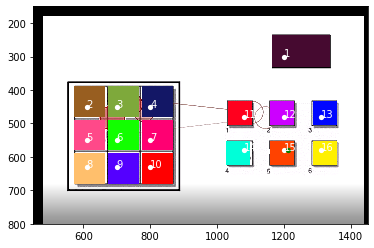

In [757]:
c,q =('c3', 'q8')
#echantillons[c][q]=[[260,500,700,260,500,700,260,500,700,1150,1380,1650,1150,1380,1650],[350,350,350,500,500,500,700,700,700,350,350,350,650,650,650]]
fig, ax = plt.subplots()
ax.imshow(img[c][q])
x=echantillons[c]['q8'][0]
y=echantillons[c]['q8'][1]
ax.scatter(x,y,label=range(len(echantillons)), color="white", linewidth=3, s=5)
#ax.scatter([d[0] for d in dots],[d[1] for d in dots], color="red", linewidth=3, s=5)

ax.scatter(click[c]['r9'][q][0],click[c]['r9'][q][1],label=range(len(echantillons)), color="green", linewidth=3, s=5)
for i in range(len(echantillons[c]['q8'][0])):
    ax.annotate(i+1, (x[i], y[i]), color='white')
if (c=='c2'): 
    plt.xlim(600, 1300)
    plt.ylim(800, 250)
elif (c=='c3'):
    plt.xlim(450, 1450)
    plt.ylim(800, 150)
plt.show()


In [758]:
echantillons_couleurs[c][q]=[img[c][q][j][i] for i,j in zip(echantillons[c][q][0],echantillons[c][q][1])]

In [486]:
echantillons_couleurs[c][q]

[array([0.59607846, 0.36862746, 0.1254902 ], dtype=float32),
 array([0.49411765, 0.6627451 , 0.23137255], dtype=float32),
 array([0.07450981, 0.09019608, 0.4       ], dtype=float32),
 array([1.        , 0.28627452, 0.5372549 ], dtype=float32),
 array([0.07058824, 1.        , 0.        ], dtype=float32),
 array([1.        , 0.        , 0.44705883], dtype=float32),
 array([1.        , 0.7490196 , 0.42352942], dtype=float32),
 array([0.32941177, 0.        , 1.        ], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([1.        , 0.        , 0.11764706], dtype=float32),
 array([0.8, 0. , 1. ], dtype=float32),
 array([0.        , 0.02352941, 1.        ], dtype=float32),
 array([0.        , 1.        , 0.84705883], dtype=float32),
 array([1.        , 0.25882354, 0.        ], dtype=float32),
 array([1.       , 0.9411765, 0.       ], dtype=float32)]

On crée un tableau pour chaque image (rangées par condition et question) où on stocke pour chaque pixel s'il appartient à l'AOI ou non et à laquelle (d'après sa couleur)

In [469]:
"""aoi={}
for c0 in df:
    aoi[c0]={}
    for q0 in ['q'+str(i) for i in range(1,11)]:
        aoi[c0][q0]=[]
        for i in range(len(img[c0][q0])):
            aoi[c0][q0].append([])
            for j in range(len(img[c0][q0][i])):
                aoi[c0][q0][i].append(0)"""

Par exemple je veux que pour la condition1, question1 le pixel (500,500) soit dans l'AOI n°5

Le code prend quelques minutes à s'executer. Si voulez seulement consulter les valeurs utilisez plutôt les fichiers json (voir un peu plus bas)

In [759]:
"""for i in range(len(aoi[c][q])):
    for j in range(len(aoi[c][q][i])):
        for k in range(len(echantillons_couleurs[c][q])):
            couleur_ref=echantillons_couleurs[c][q][k]
            pixel=img[c][q][i][j]
            if np.all([couleur_ref[l]==pixel[l] for l in range(3)]):
                #range(3) parce que chaque pixel contient les 3 valeurs RGB
                      aoi[c][q][i][j]=k+1"""

              

Enregistrer ou importer les données

In [9]:
import json
"""with open('aoi/aoi'+str(c)+str(q)+'.json', 'w') as outfile:
    json.dump(aoi[c][q], outfile)  """

"with open('aoi/aoi'+str(c)+str(q)+'.json', 'w') as outfile:\n    json.dump(aoi[c][q], outfile)  "

In [11]:
aoi={}
for c0 in df:
    aoi[c0]={}
    for q0 in ['q'+str(i) for i in range(1,11)]:
        aoi[c0][q0]=[]
        for i in range(len(img[c0][q0])):
            with open('aoi/aoi'+str(c0)+str(q0)+'.json') as json_file:
                aoi[c0][q0] = json.load(json_file)

KeyboardInterrupt: 

On peut tester qu'une cellule contient bien l'AOI correspondante

In [761]:
[[aoi['c3']['q8'][i][j] for i in range(570,590)] for j in range(1100,1120)]

[[14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14],
 [14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14],
 [14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 15, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0],
 [14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
 

In [765]:
aoi['c3']['q8'][580][1211]

15

## AOI Gaze

Maintenant on souhaite étiqueter les gaze point pour savoir si la personne regardait une des aera of interest. On ajoute une colonne AOI à nos données pour chaque question et enregistrement.

In [5]:
aoi_gaze={}
for c0 in df:
    aoi_gaze[c0]={}
    for r0 in df[c0]:
        aoi_gaze[c0][r0]={}
        for q0 in df[c0][r0]:
            aoi_gaze[c0][r0][q0]=[]

In [6]:
"""for c in df:
    for r in df[c]:
        for q in df[c][r]:
            x=df[c][r][q]['Gaze point X'].fillna(0)
            y=df[c][r][q]['Gaze point Y'].fillna(0)
            aoi_gaze[c][r][q]=[aoi[c][q][int(j)][int(i)] for i,j in zip(x,y) if ((0<j)and(j<1080) and (0<i) and (i<1920))]"""

"for c in df:\n    for r in df[c]:\n        for q in df[c][r]:\n            x=df[c][r][q]['Gaze point X'].fillna(0)\n            y=df[c][r][q]['Gaze point Y'].fillna(0)\n            aoi_gaze[c][r][q]=[aoi[c][q][int(j)][int(i)] for i,j in zip(x,y) if ((0<j)and(j<1080) and (0<i) and (i<1920))]"

On stocke ces données aussi dans un fichier

In [395]:
"""for c in df:
    for r in df[c]:
        for q in df[c][r]:
            with open('aoi/aoi_gaze.json', 'w') as outfile:
                json.dump(aoi_gaze[c][r][q], outfile)  """

In [8]:
import json

In [38]:
for c in df:
    for r in df[c]:
        for q in df[c][r]:
            with open('aoi/aoi_gaze'+str(c)+str(r)+str(q)+'.json') as json_file:
                aoi_gaze[c][r][q] = json.load(json_file)

Exemple de valeurs issues des AOI pour la question 1 condition 1

In [10]:
unique, counts = np.unique(aoi_gaze['c3']['r7']['q8'], return_counts=True)

NameError: name 'np' is not defined

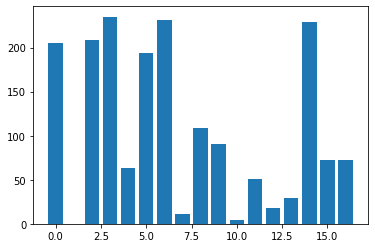

In [768]:
plt.bar(unique,counts)
plt.show()

Retraitement des AOI, on uniformise la façon d'appeler une zone dans les AOI quelque soit la question et on aide à l'identification des zones

In [39]:
for c in['c2','c3']:
    for r in aoi_gaze[c]:
        for q in aoi_gaze[c][r]:
            for i in range(len(aoi_gaze[c][r][q])):
                if aoi_gaze[c][r][q][i]==1:
                    aoi_gaze[c][r][q][i]='timer' 
                elif aoi_gaze[c][r][q][i]!=0:
                    aoi_gaze[c][r][q][i]-=1
                

In [40]:
for c in aoi_gaze:
    for r in aoi_gaze[c]:
        for q in ['q1','q4','q5','q7','q8','q9']:
            for i in range(len(aoi_gaze[c][r][q])):
                if aoi_gaze[c][r][q][i] in [x for x in range(1,10)]:
                    aoi_gaze[c][r][q][i]='enonce'+str(aoi_gaze[c][r][q][i]) 
                elif aoi_gaze[c][r][q][i] in [x for x in range(10,17)]:
                    aoi_gaze[c][r][q][i]='reponses'+str(aoi_gaze[c][r][q][i])
        

In [41]:
for c in aoi_gaze:
    for r in aoi_gaze[c]:
        q='q2'
        for i in range(len(aoi_gaze[c][r][q])):
            if aoi_gaze[c][r][q][i] in [x for x in range(1,5)]:
                aoi_gaze[c][r][q][i]='enonce'+str(aoi_gaze[c][r][q][i]) 
            elif aoi_gaze[c][r][q][i] in [x for x in range(5,9)]:
                aoi_gaze[c][r][q][i]='reponses'+str(aoi_gaze[c][r][q][i])
        q='q3'
        for i in range(len(aoi_gaze[c][r][q])):
            if aoi_gaze[c][r][q][i] in [x for x in range(1,9)]:
                aoi_gaze[c][r][q][i]='enonce'+str(aoi_gaze[c][r][q][i]) 
            elif aoi_gaze[c][r][q][i] in [x for x in range(9,13)]:
                aoi_gaze[c][r][q][i]='reponses'+str(aoi_gaze[c][r][q][i])
        q='q6'
        for i in range(len(aoi_gaze[c][r][q])):
            if aoi_gaze[c][r][q][i] in [x for x in range(1,9)]:
                aoi_gaze[c][r][q][i]='enonce'+str(aoi_gaze[c][r][q][i]) 
            elif aoi_gaze[c][r][q][i] in [x for x in range(9,13)]:
                aoi_gaze[c][r][q][i]='reponses'+str(aoi_gaze[c][r][q][i])
        
        q='q10'
        for i in range(len(aoi_gaze[c][r][q])):
            if aoi_gaze[c][r][q][i] in [x for x in range(1,10)]:
                aoi_gaze[c][r][q][i]='enonce'+str(aoi_gaze[c][r][q][i]) 
            elif aoi_gaze[c][r][q][i] in [x for x in range(10,15)]:
                aoi_gaze[c][r][q][i]='reponses'+str(aoi_gaze[c][r][q][i])


In [42]:
aoi_gaze['c']['r3']['q8']

KeyError: 'r3'

## AOI Click

Pour recueillir les réponses aux exercices des utilisateurs on va procéder d'une manière similaire en collectant les coordonnées des clics pour les étiqueter

In [27]:
#On retire tous les évènements durant la calibration et les instructions
for c in events:
    for r in events[c]:
        temp=list(events[c][r]['Event'].keys())
        i=0
        while i < len(temp) and "Stimulus" not in events[c][r]['Event'][temp[i]]:
            i+=1
        events[c][r]['Events']={k : events[c][r]['Event'][k] for k in temp if k>=temp[i] }
        events[c][r]['Recording timestamp']={k : events[c][r]['Recording timestamp'][k] for k in temp if k>=temp[i] }

In [28]:
events['c1']['r1']

{'Event': {0: 'RecordingStart',
  53: 'Eye tracker Calibration start',
  823: 'MouseEvent',
  832: 'MouseEvent',
  3352: 'MouseEvent',
  3360: 'MouseEvent',
  3364: 'Eye tracker Calibration end',
  3369: 'InstructionsStart',
  5579: 'MouseEvent',
  5582: 'InstructionsEnd',
  5639: 'MouseEvent',
  5644: 'ImageStimulusStart',
  6877: 'MouseEvent',
  6881: 'ImageStimulusEnd',
  6882: 'ImageStimulusStart',
  6887: 'MouseEvent',
  7690: 'MouseEvent',
  7693: 'ImageStimulusEnd',
  7694: 'ImageStimulusStart',
  7701: 'MouseEvent',
  8668: 'MouseEvent',
  8672: 'ImageStimulusEnd',
  8673: 'ImageStimulusStart',
  8677: 'MouseEvent',
  10146: 'MouseEvent',
  10150: 'ImageStimulusEnd',
  10151: 'ImageStimulusStart',
  10156: 'MouseEvent',
  10821: 'MouseEvent',
  10824: 'ImageStimulusEnd',
  10825: 'ImageStimulusStart',
  10830: 'MouseEvent',
  12562: 'MouseEvent',
  12565: 'ImageStimulusEnd',
  12566: 'ImageStimulusStart',
  12571: 'MouseEvent',
  15063: 'MouseEvent',
  15067: 'ImageStimulusEnd'

In [30]:
m={}
c='c1'
r='r1'
for c in events:
    m[c]={}
    for r in events[c]:
        m[c][r]=[i for i in events[c][r]['Event'] if events[c][r]['Event'][i]=='MouseEvent']

In [31]:
mouse_click={}
for c in m:
    mouse_click[c]={}
    for r in m[c]:
        mouse_click[c][r]={}
        for j in m[c][r]:
            i=0
            found = j <time_stamps[c][r][i]
            while i<(len(time_stamps[c][r])) and not found:
                i+=1
                found = j <time_stamps[c][r][i]
            if j>time_stamps[c][r][0]:
                mouse_click[c][r]['q'+str(i)]=j

In [32]:
click={}
for c in mouse_click:
    click[c]={}
    for r in mouse_click[c]:
        click[c][r]={}
        for q in mouse_click[c][r]:
            event=mouse_click[c][r][q]
            x=df[c][r][q]['Mouse position X'][event+1]
            y=df[c][r][q]['Mouse position Y'][event+1]
            click[c][r][q]=(x,y)

NameError: name 'df' is not defined

In [33]:
time_stamps

{'c1': {'r1': [5644,
   6882,
   7694,
   8673,
   10151,
   10825,
   12566,
   15068,
   15804,
   17126,
   18315],
  'r3': [4692,
   5665,
   6320,
   6849,
   8033,
   8599,
   10326,
   12577,
   13898,
   15806,
   18477],
  'r5': [4643,
   8893,
   9766,
   11026,
   13249,
   16945,
   20724,
   25991,
   29514,
   31607,
   34009]},
 'c2': {'r2': [6251,
   7057,
   7429,
   8269,
   10186,
   10964,
   11932,
   13037,
   14639,
   15352,
   17266],
  'r4': [4615,
   5376,
   6389,
   8197,
   9659,
   11073,
   12124,
   13065,
   14375,
   15501,
   16309],
  'r6': [4496,
   6570,
   7348,
   8420,
   9238,
   10664,
   11713,
   13368,
   13966,
   14596,
   16546]},
 'c3': {'r7': [3882,
   4772,
   5197,
   6248,
   9283,
   9850,
   14092,
   18791,
   20712,
   22461,
   25488],
  'r8': [5977,
   6827,
   7243,
   7965,
   11860,
   12949,
   15066,
   18744,
   20036,
   21646,
   23113],
  'r9': [4657,
   5555,
   5943,
   6687,
   9827,
   11320,
   12988,
   15053,


On calcule le temps de réponse pour chaque question

In [76]:
temps_reponse={}

for c in mouse_click:
    temps_reponse[c]={}
    for r in mouse_click[c]:
        temps_reponse[c][r]={}
        last_click=time_stamps[c][r][0]
        for q in mouse_click[c][r]:
            event=mouse_click[c][r][q]
            this_click=events[c][r]['Recording timestamp'][event]
            temps_reponse[c][r][q]= this_click-last_click
            last_click=this_click

Pour les valeurs manquantes qui sont les questions pour lesquelles le sujet n'a pas eu le temps de répondre (pas de clic) c'est que la personne a été au bout des 30 secondes donc on note 30 secondes

In [77]:
for c in df:
    for r in df[c]:
        for q in df[c][r]:
            if q not in temps_reponse[c][r]:
                temps_reponse[c][r][q]=30000000

In [78]:
temps_reponse

{'c1': {'r1': {'q1': 107074798,
   'q2': 10415878,
   'q3': 14312269,
   'q4': 22631955,
   'q5': 9687940,
   'q6': 26447672,
   'q7': 39496496,
   'q8': 10495991,
   'q9': 19799709,
   'q10': 17494603},
  'r3': {'q1': 86468202,
   'q2': 8695595,
   'q3': 7088373,
   'q4': 18424172,
   'q5': 8223808,
   'q6': 27104152,
   'q7': 35312081,
   'q8': 20319648,
   'q9': 29544239,
   'q10': 43100383},
  'r5': {'q1': 140824115,
   'q2': 13600016,
   'q3': 20224122,
   'q4': 36231820,
   'q5': 60912347,
   'q6': 61583422,
   'q7': 86592023,
   'q8': 56416017,
   'q9': 33239851,
   'q10': 38712900}},
 'c2': {'r2': {'q1': 114235036,
   'q2': 4976124,
   'q3': 12975836,
   'q4': 184011,
   'q5': 41743919,
   'q6': 15383965,
   'q7': 17144000,
   'q8': 24128297,
   'q9': 11287779,
   'q10': 29627300},
  'r4': {'q1': 84514468,
   'q2': 15328031,
   'q3': 95838,
   'q4': 52751953,
   'q5': 21879949,
   'q6': 16344466,
   'q7': 14519556,
   'q8': 19848100,
   'q9': 17416186,
   'q10': 11938522},
  'r

In [1]:
aoi_click={}
for c in click:
    aoi_click[c]={}
    for r in click[c]:
        aoi_click[c][r]={}
        for q in click[c][r]:
            y=int(click[c][r][q][1])
            x=int(click[c][r][q][0])
            aoi_click[c][r][q]=aoi[c][q][y][x]

NameError: name 'click' is not defined

In [782]:
#On modifie deux click qui sont légèrement décalées par rapport aux aoi
aoi_click['c1']['r1']['q5']=12
aoi_click['c2']['r6']['q5']=12

In [783]:
with open('aoi/aoi_click.json', 'w') as outfile:
    json.dump(aoi_click, outfile) 

In [40]:
import json
with open('aoi/aoi_click.json') as json_file:
    aoi_click= json.load(json_file)

Rappel de l'organisation des AOI

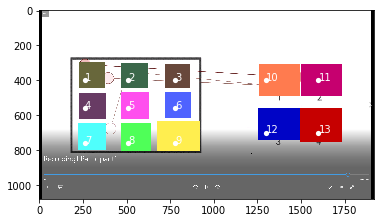

In [804]:
c,q =('c1', 'q10')
fig, ax = plt.subplots()
ax.imshow(img[c][q])
x=echantillons[c][q][0]
y=echantillons[c][q][1]
ax.scatter(x,y,label=range(len(echantillons)), color="white", linewidth=3, s=5)
for i in range(len(echantillons[c][q][0])):
    ax.annotate(i+1, (x[i], y[i]), color='white')
if (c=='c2'): 
    plt.xlim(600, 1300)
    plt.ylim(800, 250)
elif (c=='c3'):
    plt.xlim(450, 1450)
    plt.ylim(800, 150)
plt.show()

On entre donc ici la bonne réponse aux différentes questions

In [41]:
bonne_reponse={}
for c in ('c1','c2','c3'):
    bonne_reponse[c]={}
bonne_reponse['c1']['q1']=12
bonne_reponse['c2']['q1']=13
bonne_reponse['c3']['q1']=13
bonne_reponse['c1']['q2']=8
bonne_reponse['c2']['q2']=9
bonne_reponse['c3']['q2']=9
bonne_reponse['c1']['q3']=10
bonne_reponse['c2']['q3']=11
bonne_reponse['c3']['q3']=11
bonne_reponse['c1']['q4']=14
bonne_reponse['c2']['q4']=15
bonne_reponse['c3']['q4']=15
bonne_reponse['c1']['q5']=12
bonne_reponse['c2']['q5']=13
bonne_reponse['c3']['q5']=13
bonne_reponse['c1']['q6']=11
bonne_reponse['c2']['q6']=12
bonne_reponse['c3']['q6']=12
bonne_reponse['c1']['q7']=14
bonne_reponse['c2']['q7']=15
bonne_reponse['c3']['q7']=15
bonne_reponse['c1']['q8']=14
bonne_reponse['c2']['q8']=15
bonne_reponse['c3']['q8']=15
bonne_reponse['c1']['q9']=13
bonne_reponse['c2']['q9']=14
bonne_reponse['c3']['q9']=14
bonne_reponse['c1']['q10']=11
bonne_reponse['c2']['q10']=12
bonne_reponse['c3']['q10']=12


On evalue la réponse des participants

In [87]:
evaluation={}
for c in aoi_click:
    evaluation[c]={}
    for r in aoi_click[c]:
        evaluation[c][r]={}
for c in aoi_click:
    for r in aoi_click[c]:
        for q,v in aoi_click[c][r].items():
            evaluation[c][r][q]= 1 if ((v==bonne_reponse[c][q])and temps_reponse[c][r][q]<30000000) else 0
    

In [88]:
for c in df:
    for r in df[c]:
        for q in df[c][r]:
            if q not in evaluation[c][r]:
                evaluation[c][r][q]=0

In [90]:
i=0
for c in evaluation:
    for r in evaluation[c]:
        for q in evaluation[c][r]:
            i+=1

In [91]:
i

90

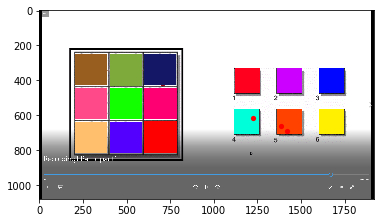

In [814]:
c,q =('c1', 'q9')
fig, ax = plt.subplots()
ax.imshow(img[c][q])
ax.scatter([click[c][r][q][0] for r in click[c]],[click[c][r][q][1] for r in click[c]],label=range(len(echantillons)), color="red", linewidth=3, s=5)
if (c=='c2'): 
    plt.xlim(600, 1300)
    plt.ylim(800, 250)
elif (c=='c3'):
    plt.xlim(450, 1450)
    plt.ylim(800, 150)
plt.show()

In [94]:
condition=[]
recording=[]
question=[]
reponse=[]
val_reponse=[]
for c in evaluation:
    for r in evaluation[c]:
        for q,v in evaluation[c][r].items():
            condition.append(c)
            recording.append(r)
            question.append(q)
            if q in aoi_click[c][r]:
                reponse.append(aoi_click[c][r][q])
            else:
                reponse.append(0)
            val_reponse.append(evaluation[c][r][q])

In [95]:
evaluation_data=pd.DataFrame()

In [96]:
evaluation_data['Condition']=condition
evaluation_data['Recording']=recording
evaluation_data['Question']=question
evaluation_data['Reponse']=reponse
evaluation_data['Reponse_juste']=val_reponse

In [97]:
evaluation_data.shape

(90, 5)

# Extraction des trajectoires 

In [53]:
traj={}
for c in aoi_gaze :
    traj[c]={}
    for r in aoi_gaze[c]:
        traj[c][r]={}
        for q in aoi_gaze[c][r]:
            traj0=[(aoi_gaze[c][r][q][i],aoi_gaze[c][r][q][i+1]) for i in range(len(aoi_gaze[c][r][q])-1) if (aoi_gaze[c][r][q][i]!=aoi_gaze[c][r][q][i+1]) ]
            traj[c][r][q]={}
            i=0
            while i <len(traj0)-1:
                if (traj0[i][1]==0 and traj0[i+1][0]==0) :
                    if (traj0[i][0]!=traj0[i+1][1]):
                        if (traj0[i][0],traj0[i+1][1]) in traj[c][r][q]:
                            traj[c][r][q][(traj0[i][0],traj0[i+1][1])]+=1
                        else:
                            traj[c][r][q][(traj0[i][0],traj0[i+1][1])]=1

                    i+=1
                else:
                    if traj0[i] in traj[c][r][q]:
                            traj[c][r][q][traj0[i]]+=1
                    else:
                        traj[c][r][q][traj0[i]]=1

                i+=1

In [57]:
vectors=[]
for c in traj:
    for r in traj[c]:
        for q in traj[c][r]:
            vectors=vectors+list(traj[c][r][q].keys())
vectors=list({i for i in vectors})

In [58]:
vectors

[('timer', 'enonce5'),
 ('reponses14', 'enonce3'),
 ('enonce9', 'reponses13'),
 ('reponses14', 'enonce8'),
 ('enonce7', 'enonce5'),
 ('enonce3', 'enonce4'),
 ('enonce9', 'enonce7'),
 ('enonce7', 'reponses9'),
 ('reponses9', 'enonce8'),
 ('timer', 'enonce2'),
 ('reponses6', 'reponses5'),
 ('enonce9', 'enonce2'),
 ('reponses16', 'reponses11'),
 ('enonce8', 'enonce9'),
 ('enonce7', 'enonce1'),
 (0, 'timer'),
 (0, 'enonce4'),
 ('reponses11', 'enonce4'),
 ('enonce3', 'reponses7'),
 ('enonce9', 'enonce5'),
 ('enonce3', 'reponses12'),
 ('reponses7', 'timer'),
 ('reponses11', 'enonce5'),
 ('reponses7', 'enonce4'),
 ('reponses14', 'enonce4'),
 ('reponses13', 'enonce3'),
 ('reponses14', 'enonce5'),
 ('reponses9', 'timer'),
 ('reponses15', 'timer'),
 ('enonce4', 'enonce9'),
 ('reponses8', 'reponses7'),
 ('enonce4', 'reponses12'),
 ('reponses13', 'enonce7'),
 ('enonce2', 'enonce5'),
 ('reponses13', 'reponses15'),
 ('reponses11', 'reponses12'),
 ('enonce3', 'enonce6'),
 ('reponses9', 'enonce5'),
 (

In [76]:
trajectories_data=pd.DataFrame()


In [78]:
condition=[]
recording=[]
question=[]
for c in traj:
    for r in traj[c]:
        for q in traj[c][r]:
            condition.append(c)
            recording.append(r)
            question.append(q)
trajectories_data['Condition']=condition
trajectories_data['Recording']=recording
trajectories_data['Question']=question
for i in vectors:
    temp_list=[]
    for c in traj:
        for r in traj[c]:
            for q in traj[c][r]:
                temp_list.append(traj[c][r][q][i] if i in traj[c][r][q] else 0)
        
    trajectories_data[i]=temp_list

In [79]:
trajectories_data

(timer, enonce5)  (reponses14, enonce3)  (enonce9, reponses13)  \
0                  0                      0                      1   
1                  0                      0                      0   
2                  0                      0                      0   
3                  0                      0                      3   
4                  0                      0                      0   
..               ...                    ...                    ...   
85                 0                      0                      0   
86                 0                      0                      0   
87                 0                      0                      2   
88                 0                      0                      1   
89                 0                      0                      0   

    (reponses14, enonce8)  (enonce7, enonce5)  (enonce3, enonce4)  \
0                       0                   0                   0   
1                       0                   0                   2   
2                       0                   0                   1   
3                       0                   1                   0   
4                       0                   0                   0   
..                    ...                 ...                 ...   
85                      0                   1                   5   
86                      0                   1                   0   
87                      0                   1                   0   
88                      0                   1                   1   
89                      0                   0                   0   

    (enonce9, enonce7)  (enonce7, reponses9)  (reponses9, enonce8)  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     1                     1   
3                    0                     0                     0   
4                    0                     0                     0   
..                 ...                   ...                   ...   
85                   0                     1                     1   
86                   0                     0                     0   
87                   0                     0                     0   
88                   0                     0                     0   
89                   0                     0                     0   

    (timer, enonce2)  ...  (enonce1, enonce7)  (reponses9, enonce3)  \
0                  0  ...                   0                     0   
1                  0  ...                   0                     0   
2                  0  ...                   0                     0   
3                  0  ...                   0                     0   
4                  0  ...                   0                     0   
..               ...  ...                 ...                   ...   
85                 0  ...                   0                     0   
86                 0  ...                   0                     0   
87                 0  ...                   0                     0   
88                 0  ...                   0                     0   
89                 0  ...                   0                     0   

    (enonce8, timer)  (enonce3, reponses15)  (enonce9, enonce8)  \
0                  0                      0                   2   
1                  0                      0                   0   
2                  0                      0                   0   
3                  0                      0                   0   
4                  0                      0                   1   
..               ...                    ...                 ...   
85                 0                      0                   0   
86                 0                      0                   1   
87                 0                 

In [80]:
trajectories_data.to_csv('trajectories_data.csv')

In [63]:
traj[c][r][q]

{(0, 'enonce5'): 1,
 ('enonce5', 'enonce6'): 1,
 ('enonce6', 'reponses10'): 2,
 ('reponses10', 'enonce2'): 1,
 ('enonce2', 'enonce5'): 1,
 ('enonce5', 'enonce8'): 2,
 ('enonce8', 'enonce6'): 1,
 ('enonce6', 'enonce3'): 5,
 ('enonce3', 'enonce6'): 2,
 ('enonce6', 'reponses13'): 1,
 ('reponses13', 'reponses14'): 1,
 ('reponses14', 'reponses15'): 1,
 ('reponses15', 'reponses12'): 1,
 ('reponses12', 'enonce6'): 1,
 ('enonce3', 'reponses14'): 1,
 ('reponses14', 'reponses13'): 1,
 ('reponses13', 'reponses10'): 1,
 ('reponses10', 'reponses11'): 1,
 ('reponses11', 'reponses12'): 2,
 ('reponses12', 'reponses11'): 1,
 ('reponses11', 'enonce9'): 1,
 ('enonce9', 'enonce8'): 2,
 ('enonce8', 'enonce9'): 2,
 ('enonce9', 'reponses13'): 1,
 ('reponses13', 'reponses11'): 2,
 ('reponses11', 'reponses10'): 2,
 ('reponses10', 'enonce6'): 2,
 ('enonce3', 'reponses11'): 1,
 ('reponses10', 'reponses13'): 1,
 ('reponses13', 'enonce6'): 1,
 ('enonce3', 'enonce5'): 1,
 ('enonce8', 'enonce7'): 1,
 ('enonce7', 'en

In [61]:
trajectories_data

Vectors
0         (timer, enonce5)
1    (reponses14, enonce3)
2    (enonce9, reponses13)
3    (reponses14, enonce8)
4       (enonce7, enonce5)
..                     ...
304       (enonce8, timer)
305  (enonce3, reponses15)
306     (enonce9, enonce8)
307  (reponses14, enonce7)
308  (reponses11, enonce8)

[309 rows x 1 columns]

In [46]:
traj0

{'0': 1,
 'enonce1': 26,
 'enonce2': 44,
 'enonce3': 22,
 'enonce4': 42,
 'enonce5': 42,
 'enonce6': 12,
 'enonce7': 22,
 'enonce8': 22,
 'enonce9': 8,
 'reponses10': 10,
 'reponses11': 4,
 'reponses12': 6,
 'reponses13': 119,
 'reponses14': 48,
 'reponses15': 12}

Mouvements des yeux pas secondes

In [79]:
mvt_regard_par_sec=[]
for c in traj:
    for r in traj[c]:
        for q in traj[c][r]:
            mvt_regard_par_sec.append(len(traj[c][r][q])*1000000/temps_reponse[c][r][q])

In [98]:
evaluation_data['Frequence mouvements du regard']=mvt_regard_par_sec

In [99]:
evaluation_data

Condition Recording Question  Reponse  Reponse_juste  \
0         c1        r1       q1       12              0   
1         c1        r1       q2        8              1   
2         c1        r1       q3       10              1   
3         c1        r1       q4       13              0   
4         c1        r1       q5       12              1   
..       ...       ...      ...      ...            ...   
85        c3        r9       q6       10              0   
86        c3        r9       q7       17              0   
87        c3        r9       q8       15              1   
88        c3        r9       q9       14              1   
89        c3        r9      q10       11              0   

    Frequence mouvements du regard  
0                         0.438945  
1                         3.648276  
2                         4.471688  
3                         3.799937  
4                         4.644950  
..                             ...  
85                        3.711405  
86                        6.033104  
87                        4.341884  
88                        3.788046  
89                        3.287811  

[90 rows x 6 columns]

In [100]:
evaluation_data.to_csv('evaluation_data.csv')

In [75]:
enchainements={t[0]:{} for t in traj}
for t in traj :
    if t[1] in enchainements[t[0]]:
        enchainements[t[0]][t[1]]+=1
    else :
        enchainements[t[0]][t[1]]=1

In [76]:
enchainements

{0: {5: 1},
 5: {6: 1, 8: 2},
 6: {10: 2, 3: 5, 13: 1},
 10: {2: 1, 11: 1, 6: 2, 13: 1},
 2: {5: 1},
 8: {6: 1, 9: 2, 7: 1, 13: 1},
 3: {6: 2, 14: 1, 11: 1, 5: 1},
 13: {14: 1, 10: 1, 11: 2, 6: 1},
 14: {15: 1, 13: 1},
 15: {12: 1},
 12: {6: 1, 11: 1},
 11: {12: 2, 9: 1, 10: 2},
 9: {8: 2, 13: 1},
 7: {8: 1}}

In [821]:
enonce={'c1':{'q1':range(1,10)}}
reponses={'c1':{'q1':range(10,16)}}

In [828]:
[(i,j) for i,j in traj if (i in enonce[c][q] and j in reponses[c][q])or(j in enonce[c][q] and i in reponses[c][q])]

[]

In [830]:
[(i,j) for i,j in traj if i in enonce[c][q]]

[(5, 6),
 (2, 5),
 (5, 8),
 (8, 6),
 (6, 3),
 (3, 6),
 (6, 3),
 (9, 8),
 (8, 9),
 (6, 3),
 (6, 3),
 (3, 6),
 (3, 5),
 (5, 8),
 (8, 7),
 (7, 8),
 (8, 9)]

# Heatmap

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
img = {'c'+str(i): {'q'+str(j): mpimg.imread('resized_pictures/c'+str(i)+'q'+str(j)+'.png') for j in range(1,11)}for i in range(1,4)}

In [16]:
df[c]['r1']['q9']['Gaze point X']

15804       NaN
15805    1685.0
15806       NaN
15807    1688.0
15808       NaN
          ...  
17121       NaN
17122     407.0
17123     408.0
17124       NaN
17125       NaN
Name: Gaze point X, Length: 1322, dtype: float64

In [7]:
import numpy as np

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\asus\Dev\Anaconda\lib\site-packages\ipykernel_launc

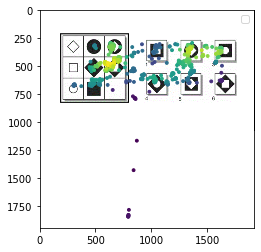

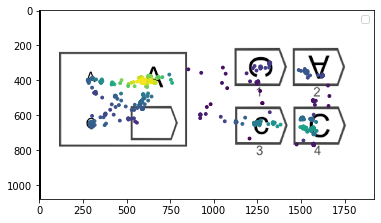

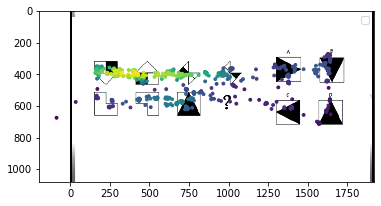

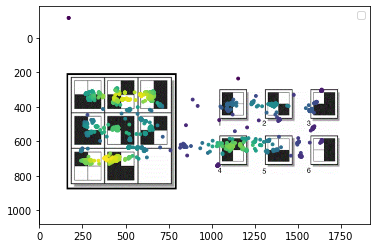

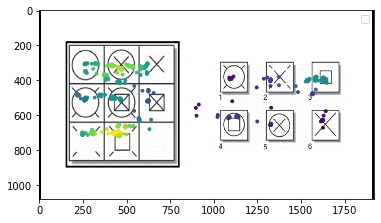

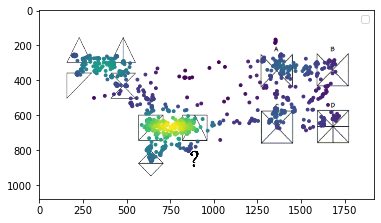

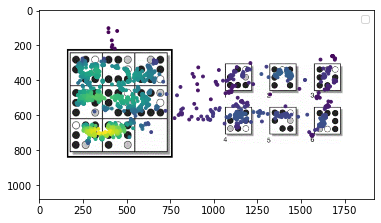

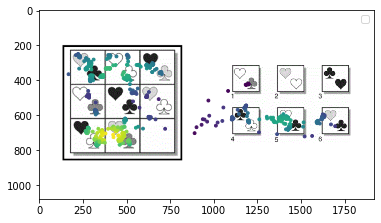

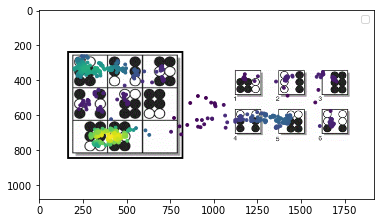

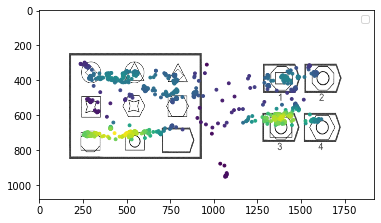

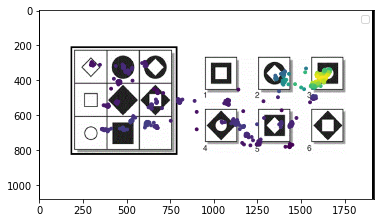

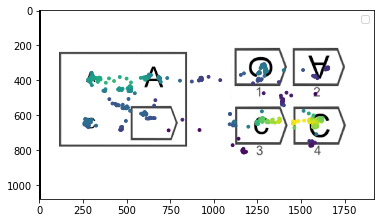

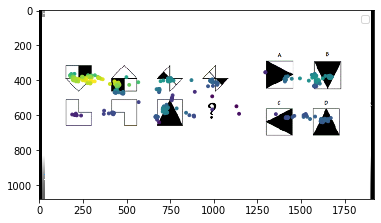

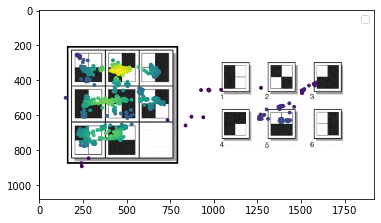

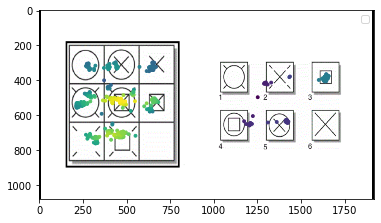

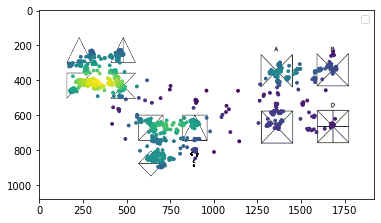

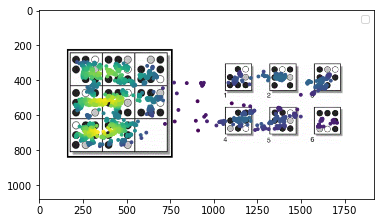

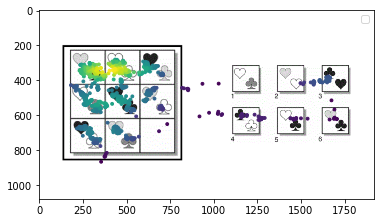

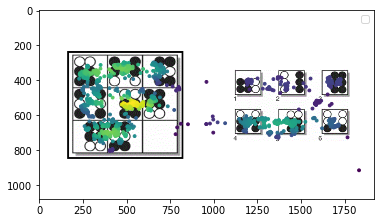

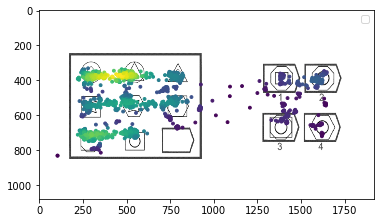

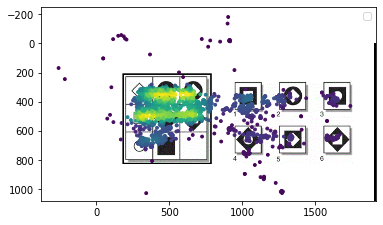

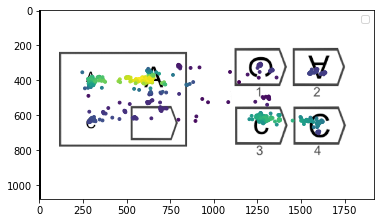

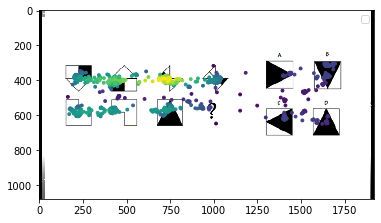

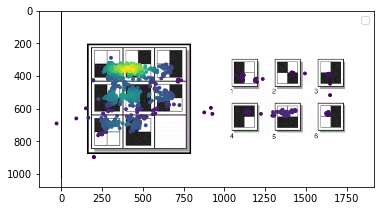

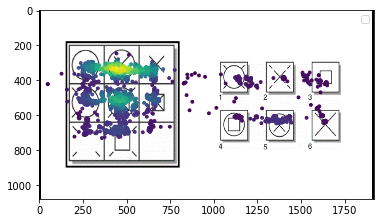

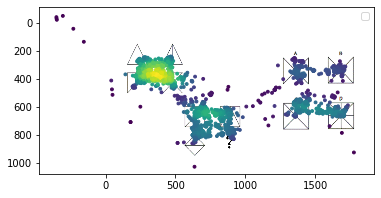

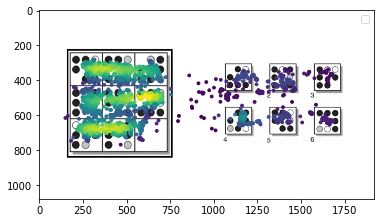

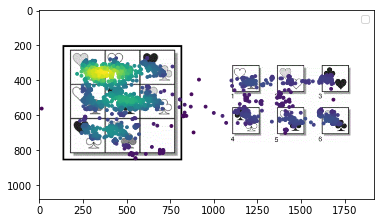

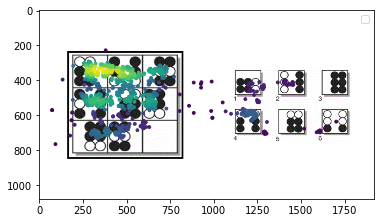

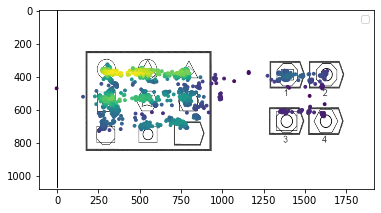

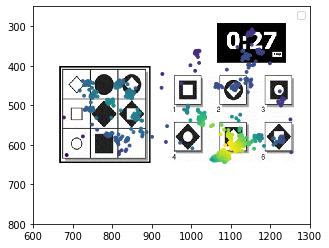

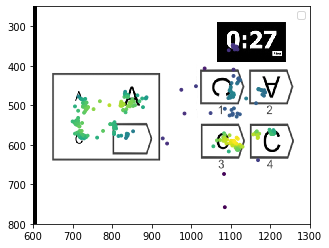

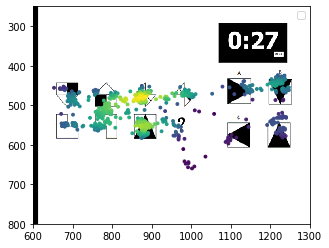

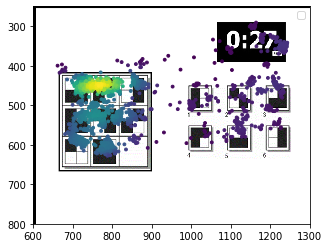

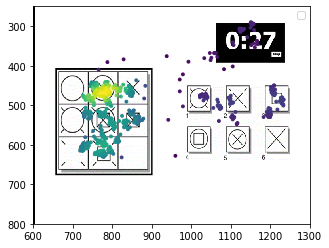

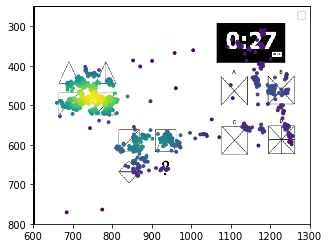

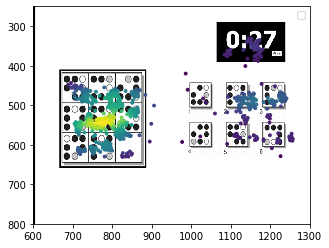

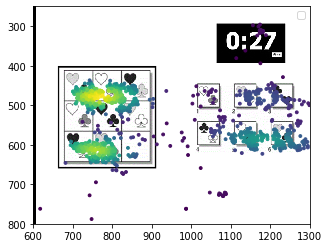

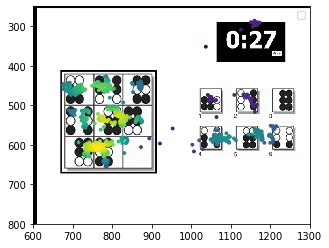

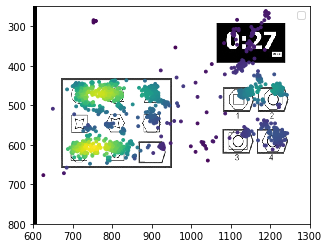

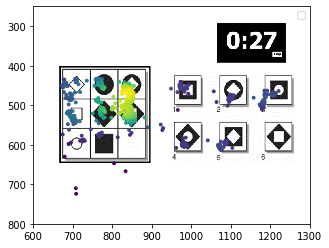

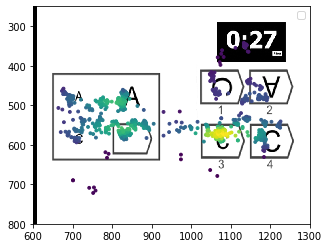

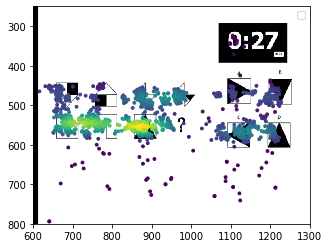

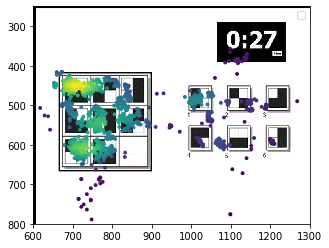

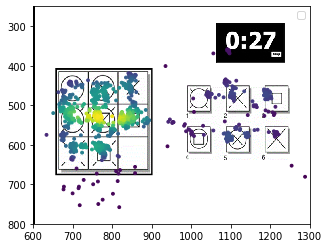

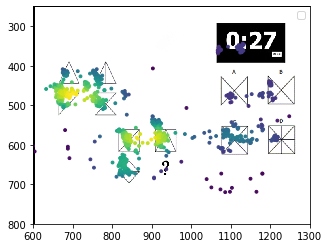

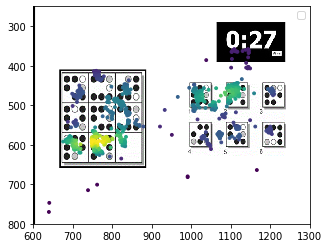

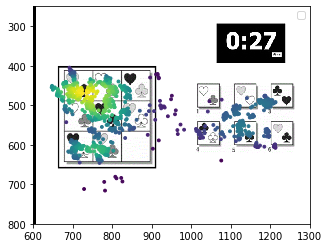

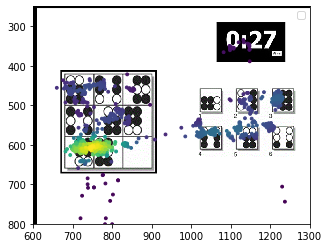

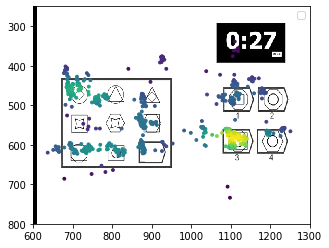

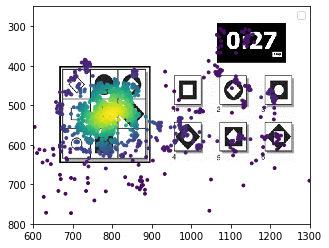

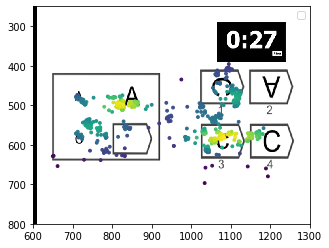

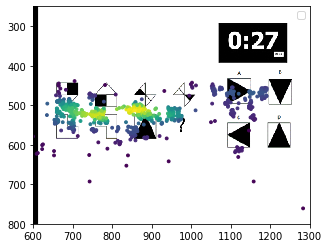

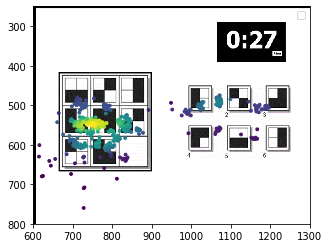

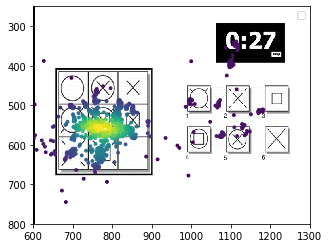

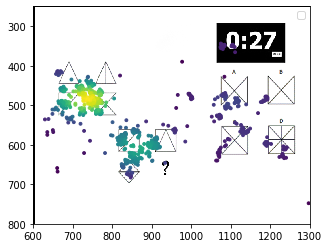

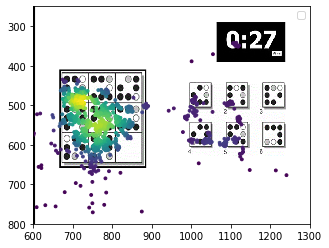

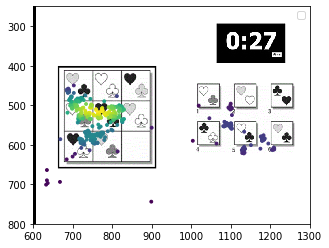

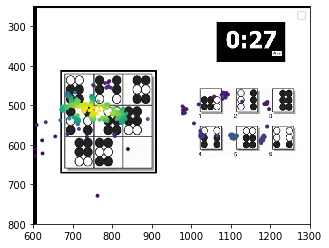

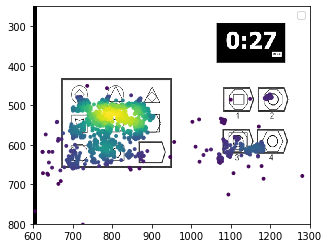

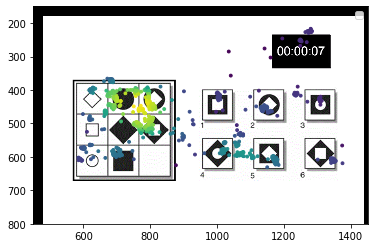

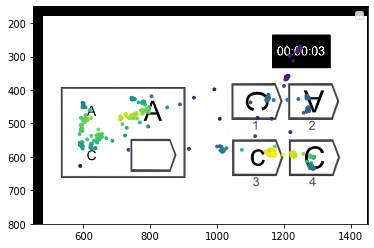

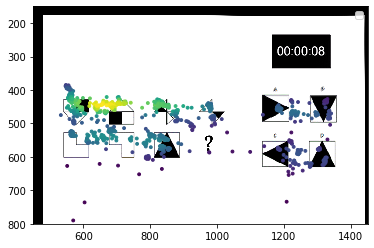

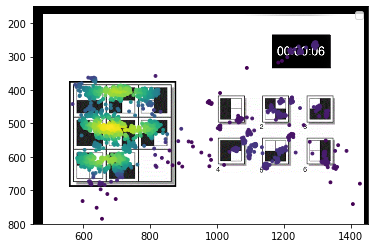

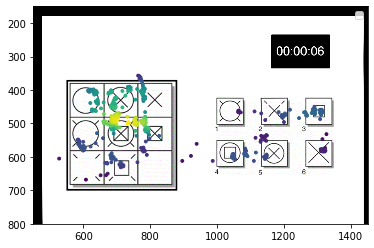

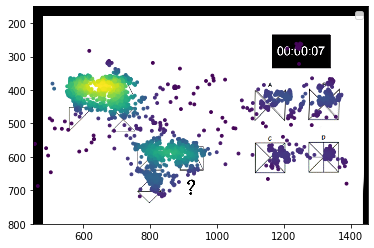

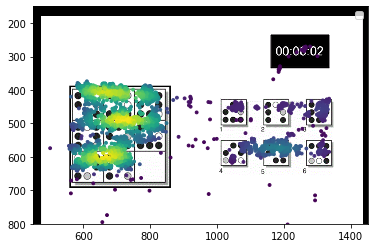

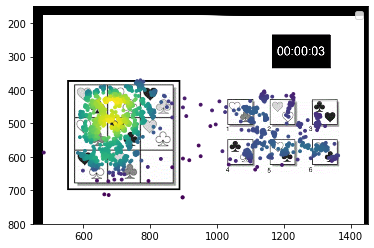

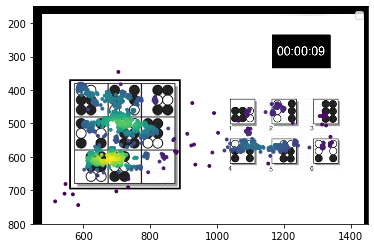

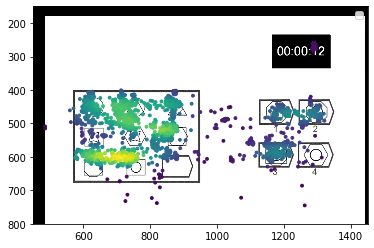

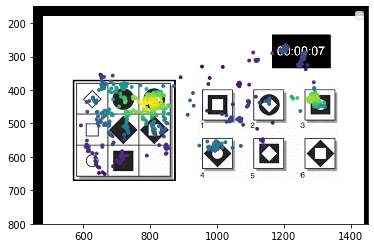

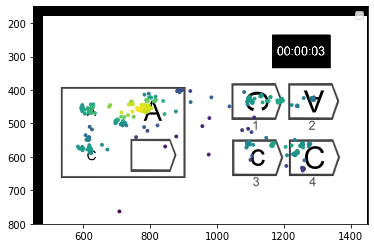

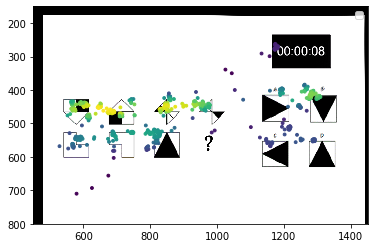

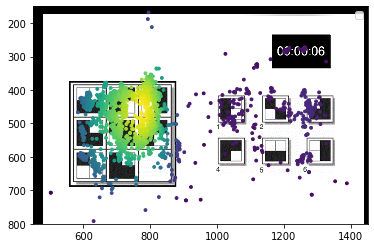

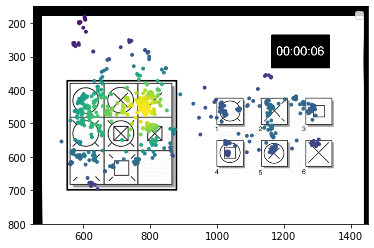

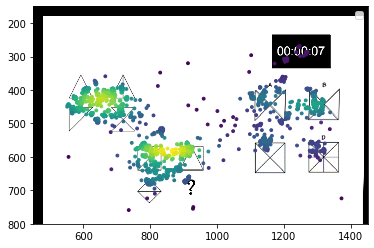

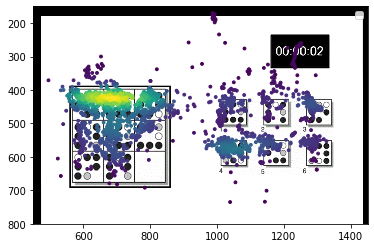

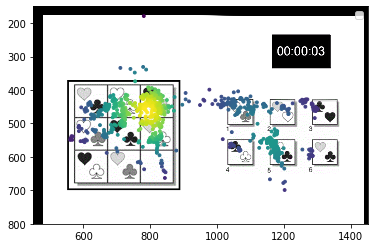

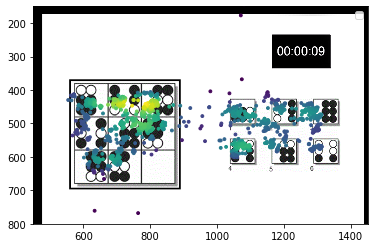

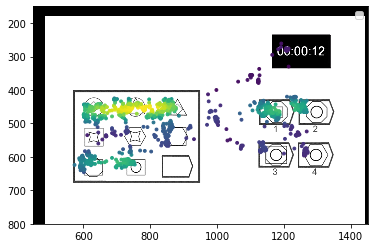

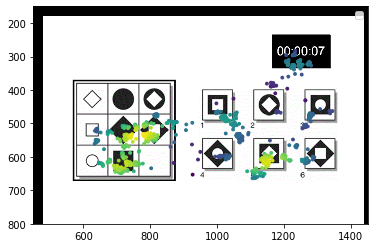

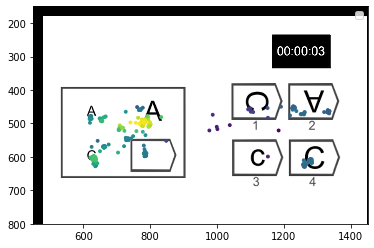

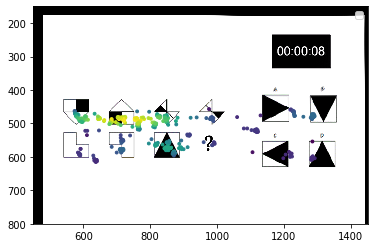

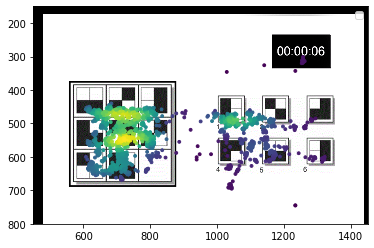

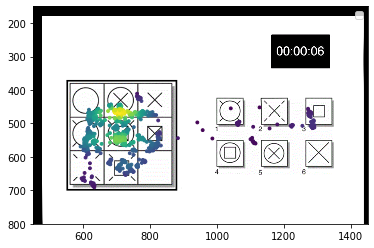

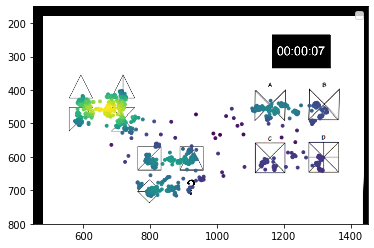

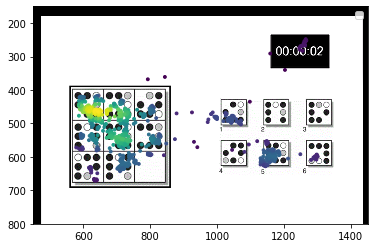

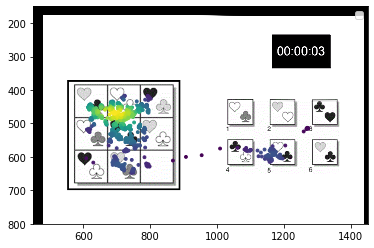

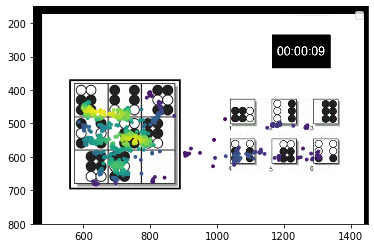

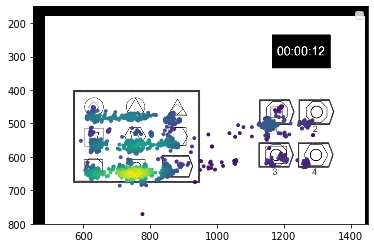

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
for c in df:
    for r in df[c]:
        for q in df[c][r]:

            fig, ax = plt.subplots()
            ax.imshow(img[c][q])
            x=[x for x in df[c][r][q]['Gaze point X'].dropna()]
            y=[y for y in df[c][r][q]['Gaze point Y'].dropna()]
            # Calculate the point density
            xy = np.vstack([x,y])
            z = gaussian_kde(xy)(xy)
            ax.scatter(x, y, c=z, s=8)
            ax.legend()
            if (c=='c2'): 
                plt.xlim(600, 1300)
                plt.ylim(800, 250)
            elif (c=='c3'):
                plt.xlim(450, 1450)
                plt.ylim(800, 150)
            plt.savefig('heatmaps/'+str(c)+str(r)+str(q)+'.png')
